# 數據預處理

In [1]:
import pandas as pd
import numpy as np

data_train = pd.read_csv("Horse.csv")
data_train.columns

Index(['年齡', '場次', '排名', '比賽日期', '賽道', '距離', '場地狀況', '班次', '檔位', '評分', '訓練師',
       '騎師', '獨贏勝率', '負磅', '體重'],
      dtype='object')

In [2]:
data_train.head()

,年齡,場次,排名,比賽日期,賽道,距離,場地狀況,班次,檔位,評分,訓練師,騎師,獨贏勝率,負磅,體重
0,6,562,11,08/04/20,"跑馬地草地""B""",1000,好,2,7,94,鄭俊偉,陳嘉熙,74,124,1112
1,6,481,13,08/03/20,"沙田草地""C""",1000,好,2,6,94,鄭俊偉,陳嘉熙,30,124,1115
2,6,407,04,08/02/20,"沙田草地""C+3""",1200,好,2,4,93,鄭俊偉,陳嘉熙,242,113,1124
3,6,350,11,19/01/20,"沙田草地""A+3""",1200,好,2,3,95,鄭俊偉,郭能,259,128,1131
4,6,299,09,01/01/20,"沙田草地""C""",1000,好,2,7,97,鄭俊偉,郭能,82,130,1117


## 查看有無缺失值

In [3]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10581 entries, 0 to 10580
Data columns (total 15 columns):
年齡      10581 non-null int64
場次      10581 non-null object
排名      10581 non-null object
比賽日期    10581 non-null object
賽道      10581 non-null object
距離      10581 non-null object
場地狀況    10581 non-null object
班次      10581 non-null object
檔位      10581 non-null object
評分      10581 non-null object
訓練師     10581 non-null object
騎師      10581 non-null object
獨贏勝率    10581 non-null object
負磅      10581 non-null object
體重      10581 non-null object
dtypes: int64(1), object(14)
memory usage: 1.2+ MB


In [4]:
# 排除中途退賽馬匹及空格
data = data_train.replace(['DISQ', 'DNF', 'FE', 'PU', 'TNP', 'UR', "VOID", 'WR', 'WV', 'WV-A', 'WX', 'WX-A', 'WXNR', "--"], np.nan)
# 刪除Nan值
data.dropna(how='any', inplace=True)
# 將排名歸類 1-3名為1, 4-14為0
data['排名'] = data['排名'].replace(["04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14"], 0)
data['排名'] = data['排名'].replace(["01", "02", "03"], 1)
data.reset_index(drop=True, inplace=True)
# 以下類型改為int或float
data[['距離', '評分', '獨贏勝率', '負磅', '體重', '檔位']] = data[['距離', '評分', '獨贏勝率', '負磅', '體重', '檔位']].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10320 entries, 0 to 10319
Data columns (total 15 columns):
年齡      10320 non-null int64
場次      10320 non-null object
排名      10320 non-null int64
比賽日期    10320 non-null object
賽道      10320 non-null object
距離      10320 non-null int64
場地狀況    10320 non-null object
班次      10320 non-null object
檔位      10320 non-null int64
評分      10320 non-null int64
訓練師     10320 non-null object
騎師      10320 non-null object
獨贏勝率    10320 non-null float64
負磅      10320 non-null int64
體重      10320 non-null int64
dtypes: float64(1), int64(7), object(7)
memory usage: 1.2+ MB


## 數據描述分析

In [5]:
data.describe()

,年齡,排名,距離,檔位,評分,獨贏勝率,負磅,體重
count,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000,10320.000000
mean,5.523256,0.274612,1397.843992,6.806202,62.342539,39.047490,123.551163,1113.329070
std,1.317303,0.446340,269.738656,3.719140,17.708552,65.292794,5.861609,63.616373
min,3.000000,0.000000,1000.000000,1.000000,11.000000,1.000000,105.000000,933.000000
25%,5.000000,0.000000,1200.000000,4.000000,50.000000,6.700000,119.000000,1067.000000
50%,5.000000,0.000000,1400.000000,7.000000,60.000000,14.000000,124.000000,1110.000000
75%,6.000000,1.000000,1650.000000,10.000000,72.000000,38.000000,128.000000,1155.000000
max,9.000000,1.000000,2400.000000,14.000000,138.000000,674.000000,133.000000,1337.000000


從mean的數據中，可以了解馬匹進入前三名的機率為27%，平均年齡為5.5歲

# 透過可視化了解數據
## 馬匹年齡分佈

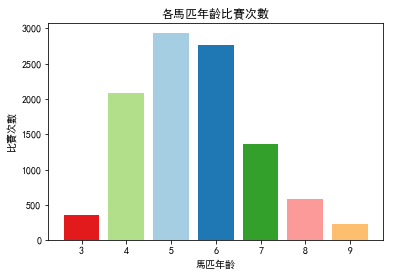

,馬匹年齡比賽次數
5,2930
6,2767
4,2083
7,1365
8,590
3,354
9,231


In [7]:
import matplotlib.pyplot as mp
import matplotlib as mpl # 顯示中文

mpl.rcParams['font.sans-serif'] = 'simhei' #默認字體
mpl.rcParams['axes.unicode_minus'] = False

fig = mp.figure()
fig.set(alpha=0.2) #設定圖表顏色alpha參數
age = data.年齡.value_counts().sort_values(ascending=False)
df = pd.DataFrame({"馬匹年齡比賽次數":age})
mp.bar(df.index, df["馬匹年齡比賽次數"], color=mp.cm.Paired(np.arange(len(df))))
mp.title('各馬匹年齡比賽次數')
mp.xlabel('馬匹年齡')
mp.ylabel('比賽次數')
mp.show()
df

## 馬匹班次等級分布

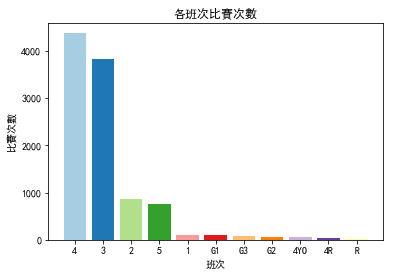

,馬匹班次比賽次數
4,4373
3,3823
2,864
5,771
1,112
G1,96
G3,87
G2,74
4YO,64
4R,44


In [8]:
h_class = data.班次.value_counts().sort_values(ascending=False)
df = pd.DataFrame({'馬匹班次比賽次數':h_class})
mp.bar(df.index, df["馬匹班次比賽次數"], color=mp.cm.Paired(np.arange(len(df))))
mp.title('各班次比賽次數')
mp.xlabel('班次')
mp.ylabel('比賽次數')
mp.show()
df

#### 班次等級之分 由高到低 
#### G1 - G2 - G3 - 1 - 2 - 3 - 4 -5 - 4YO - R - 4R (R:後備馬匹)

## 各班次的馬匹年齡分佈

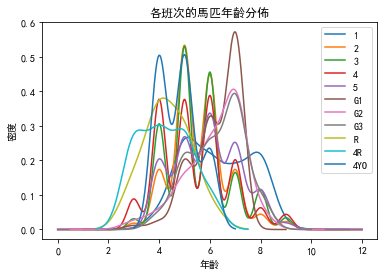

In [9]:
data.年齡[data.班次 == "1"].plot(kind='kde')
data.年齡[data.班次 == "2"].plot(kind='kde')
data.年齡[data.班次 == "3"].plot(kind='kde')
data.年齡[data.班次 == "4"].plot(kind='kde')
data.年齡[data.班次 == "5"].plot(kind='kde')
data.年齡[data.班次 == "G1"].plot(kind='kde')
data.年齡[data.班次 == "G2"].plot(kind='kde')
data.年齡[data.班次 == "G3"].plot(kind='kde')
data.年齡[data.班次 == "R"].plot(kind='kde')
data.年齡[data.班次 == "4R"].plot(kind='kde')
data.年齡[data.班次 == "4YO"].plot(kind='kde')
mp.xlabel('年齡')
mp.ylabel('密度')
mp.title('各班次的馬匹年齡分佈')
mp.legend(("1", "2", "3", "4", "5", "G1", "G2", "G3", "R", "4R", "4YO"))
mp.show()

## 各種賽道距離比賽次數

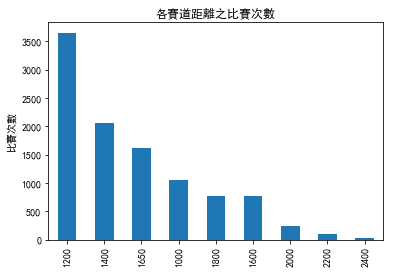

,賽道距離比賽次數
1200,3655
1400,2061
1650,1627
1000,1049
1800,781
1600,775
2000,240
2200,109
2400,23


In [10]:
dis = data.距離.value_counts().sort_values(ascending=False)
dis.plot(kind='bar')
mp.title('各賽道距離之比賽次數')
mp.ylabel("比賽次數")
mp.show()
df = pd.DataFrame({'賽道距離比賽次數':dis})
df

## 各訓練師比賽次數

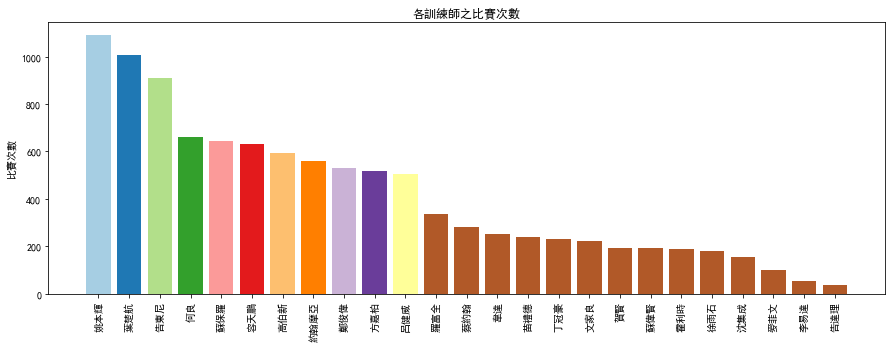

,訓練師比賽次數
姚本輝,1091
葉楚航,1005
告東尼,911
何良,660
蘇保羅,646
容天鵬,633
高伯新,593
約翰摩亞,559
鄭俊偉,532
方嘉柏,516


In [11]:
trainer = data.訓練師.value_counts().sort_values(ascending=False)
df = pd.DataFrame({'訓練師比賽次數': trainer})
mp.figure(figsize=(15,5))
mp.bar(df.index, df['訓練師比賽次數'], color=mp.cm.Paired(np.arange(len(df))))
mp.title("各訓練師之比賽次數")
mp.xticks(rotation=90)
mp.ylabel('比賽次數')
mp.show()
df
# print(data.訓練師.value_counts())

## 各騎師比賽次數
### 因騎師人數眾多，只顯示前三十名騎師的比賽次數

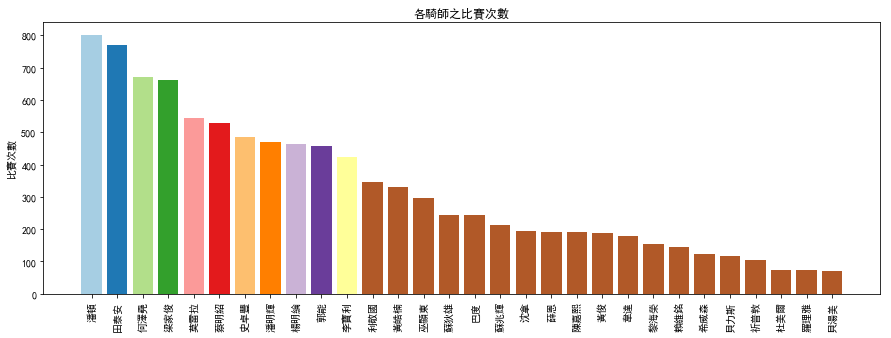

,騎師比賽次數
潘頓,801
田泰安,769
何澤堯,671
梁家俊,663
莫雷拉,544
蔡明紹,528
史卓豐,486
潘明輝,469
楊明綸,462
郭能,456


In [12]:
jocky = data.騎師.value_counts().sort_values(ascending=False).head(30)
df = pd.DataFrame({"騎師比賽次數": jocky})
mp.figure(figsize=(15,5))
mp.bar(df.index, df['騎師比賽次數'], color=mp.cm.Paired(np.arange(len(df))))
# jocky.plot(kind='bar', figsize=(15,5))
mp.title("各騎師之比賽次數")
mp.xticks(rotation=90)
mp.ylabel('比賽次數')
mp.show()
df

## 從各圖表中可以了解到
* 賽馬主要歲數落在4-6歲
* 班次在3與4的等級，馬匹競賽次數較多且要晉升班次等級較為困難。
* 各班次馬匹之年齡與年齡總體分佈趨於一致，但可以發現更高級別的馬匹，年齡落在7歲居多。
* 賽道距離主要集中在1200公尺。
* 姚本輝、葉楚航和告東尼，這三位訓練師訓練的馬匹出場次數遠高於其他訓練師。
* 騎師出場次數差異較大，第一名與第三十名差異約10倍。

## 屬性與獲勝的可視化
### 各馬匹年齡與獲勝狀況

<Figure size 432x288 with 0 Axes>

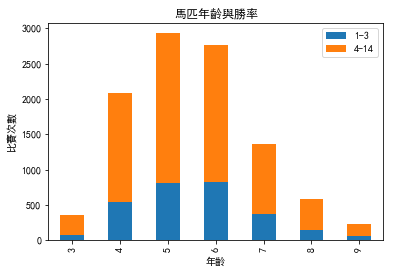

,1-3,4-14,總比賽次數,勝率
3,78,276,354,22.03
4,543,1540,2083,26.07
5,810,2120,2930,27.65
6,826,1941,2767,29.85
7,368,997,1365,26.96
8,146,444,590,24.75
9,63,168,231,27.27


In [13]:
# 馬匹年齡的獲勝狀況
fig = mp.figure()
fig.set(alpha=0.2)

rank1 = data.年齡[data.排名 == 1].value_counts()
rank0 = data.年齡[data.排名 == 0].value_counts()
df = pd.DataFrame({'1-3':rank1, "4-14":rank0})
df.plot(kind='bar', stacked=True)
mp.title('馬匹年齡與勝率')
mp.xlabel('年齡')
mp.ylabel("比賽次數")
mp.legend()
mp.show()
df['總比賽次數'] = df['1-3'] + df['4-14']
df['勝率'] = (df['1-3'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率')\
        .background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高。

## 各檔位與獲勝情況
#### 第一檔位為最內側，由內往外排序，第14檔位為最外側。

<Figure size 432x288 with 0 Axes>

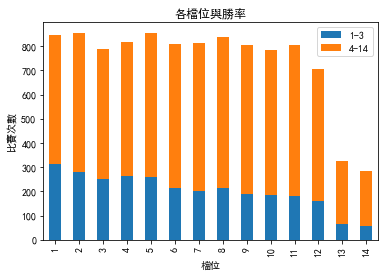

,1-3,4-14,總比賽次數,勝率
1,312,534,846,36.88
2,280,575,855,32.75
3,252,535,787,32.02
4,263,554,817,32.19
5,259,593,852,30.40
6,213,597,810,26.30
7,203,608,811,25.03
8,216,621,837,25.81
9,190,615,805,23.60
10,185,600,785,23.57


In [14]:
# 檔位的獲勝狀況
fig = mp.figure()
fig.set(alpha=0.2)

rank1 = data.檔位[data.排名 == 1].value_counts()
rank0 = data.檔位[data.排名 == 0].value_counts()
df = pd.DataFrame({'1-3':rank1, "4-14":rank0})
df.plot(kind='bar', stacked=True)
mp.title('各檔位與勝率')
mp.xlabel('檔位')
mp.ylabel('比賽次數')
mp.legend()
mp.show()
df['總比賽次數'] = df['1-3'] + df['4-14']
df['勝率'] = (df['1-3'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率')\
        .background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高。
#### 因有中途退賽等突發狀況，所以總比賽次數會不同，大部分比賽為12匹馬，少數比賽才有14匹

## 各訓練師與獲勝情況

<Figure size 432x288 with 0 Axes>

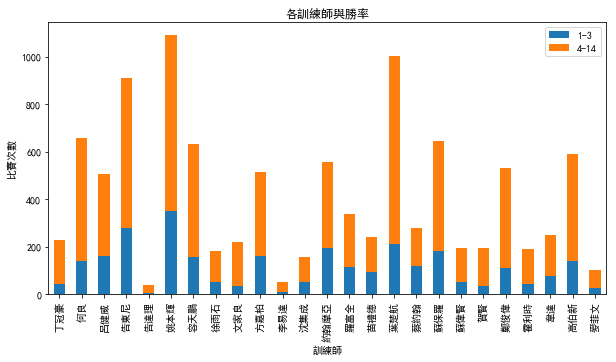

,1-3,4-14,總比賽次數,勝率
丁冠豪,41,188,229,17.90
何良,140,520,660,21.21
呂健威,163,342,505,32.28
告東尼,279,632,911,30.63
告達理,6,33,39,15.38
姚本輝,350,741,1091,32.08
容天鵬,155,478,633,24.49
徐雨石,51,130,181,28.18
文家良,33,189,222,14.86
方嘉柏,161,355,516,31.20


In [15]:
# 訓練師的獲勝狀況
fig = mp.figure()
fig.set(alpha=0.2)

rank1 = data.訓練師[data.排名 == 1].value_counts().sort_values(ascending=False)
rank0 = data.訓練師[data.排名 == 0].value_counts()
df = pd.DataFrame({'1-3':rank1, "4-14":rank0})
df.plot(kind='bar', stacked=True, figsize=(10,5))
mp.title('各訓練師與勝率')
mp.xlabel('訓練師')
mp.ylabel("比賽次數")
mp.legend(['1-3','4-14'])
mp.show()
df['總比賽次數'] = df['1-3'] + df['4-14']
df['勝率'] = (df['1-3'] / df['總比賽次數'])*100
df.style.format('{:.2f}', subset='勝率')\
        .background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高。

## 各騎師與獲勝情況


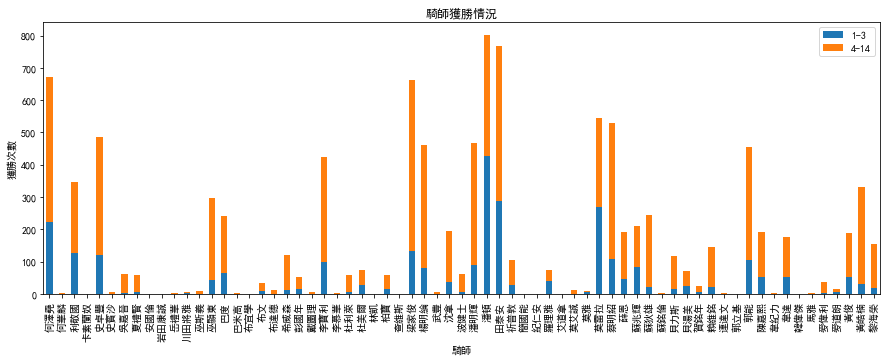

,1-3,4-14,總比賽次數,獲勝百分比
何澤堯,222,449,671,33.08
梁家俊,132,531,663,19.91
潘頓,426,375,801,53.18
田泰安,287,482,769,37.32
莫雷拉,269,275,544,49.45
蔡明紹,109,419,528,20.64


In [18]:
# 騎師的獲勝狀況
rank1 = data.騎師[data.排名 == 1].value_counts()
rank0 = data.騎師[data.排名 == 0].value_counts()
df = pd.DataFrame({'1-3':rank1, "4-14":rank0})
df = df.fillna(0)

df.plot(kind='bar', stacked=True, figsize=(15,5))
mp.title('騎師獲勝情況')
mp.xlabel('騎師')
mp.ylabel("獲勝次數")
mp.legend()
mp.show()

df['總比賽次數'] = df['1-3'] + df['4-14']
df['獲勝百分比'] = df['1-3'] / (df['總比賽次數']) * 100
race = 500
df = df.query("總比賽次數 > @race")
df.style.format('{:.2f}', subset='獲勝百分比')\
        .background_gradient('Blues',subset="獲勝百分比")


#### 主要觀察出賽場次500場以上的騎師，共6位。
#### 顏色越深，勝率越高。

## 各訓練師配各騎師的獲勝情況

/home/ubuntu/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()


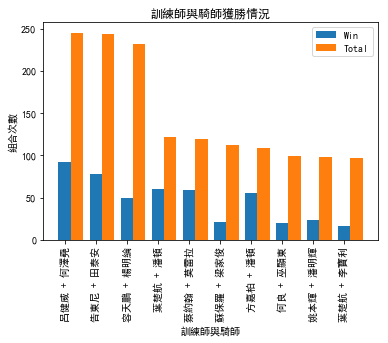

,組合比賽次數,組合獲勝次數,勝率
呂健威 + 何澤堯,245,92,37.55
告東尼 + 田泰安,244,78,31.97
容天鵬 + 楊明綸,232,50,21.55
葉楚航 + 潘頓,122,60,49.18
蔡約翰 + 莫雷拉,119,59,49.58
蘇保羅 + 梁家俊,112,21,18.75
方嘉柏 + 潘頓,109,55,50.46
何良 + 巫顯東,99,20,20.20
姚本輝 + 潘明輝,98,23,23.47
葉楚航 + 李寶利,97,16,16.49


In [22]:
# 訓練師與騎師合併
data['tj'] = data['訓練師'] + " + " +  data['騎師']
# 訓練師與騎師的獲勝狀況
rank1 = data.tj[data.排名 == 1].value_counts().sort_values(ascending=False).head(10)
total = data.tj.value_counts().head(10)
df = pd.DataFrame({'amount':total})

am = []
for i in df.index:
    a = data.groupby('tj').get_group(i)
    t_rank = a[data.排名 == 1].count()
    am.append(t_rank.排名)

df = pd.DataFrame({'組合比賽次數':total, '組合獲勝次數':am})


# 設定每個長條寬度
width = 0.4
mp.bar([i - width/2 for i in range(len(df))], df.組合獲勝次數, label='Win', width = 0.4)
mp.bar([i + width/2 for i in range(len(df))], df.組合比賽次數, label='Total', width = 0.4)

mp.title('訓練師與騎師獲勝情況')
mp.xlabel('訓練師與騎師')
x = [i - width/2 for i in range(len(df))]
mp.xticks(x, df.index, rotation=90)
mp.ylabel("組合次數")
mp.legend()
mp.show()
df['勝率'] = (df['組合獲勝次數'] / df['組合比賽次數'])*100
df.style.format('{:.2f}', subset='勝率')\
        .background_gradient('Blues',subset="勝率")

#### 顏色越深，勝率越高。

## 從各圖表中可以了解到
* 馬匹年齡落在4-7歲獲勝機會較高，與年齡分佈圖相似。
* 檔位越接近內側獲勝機會較大。
* 各訓練師對獲勝的影響力並無明顯差異，勝率都落在20%至34%之間
* 各騎師對獲勝的影響力較為明顯，有的騎師勝率50%以上而有的只有20%
* 組合次數100次以上的有7組，各訓練師與騎師組合對勝率也有明顯的差異，從50%至20%

# 機器學習
#### 主觀認為年齡與檔位對勝率影響較大
#### 使用年齡與檔位屬性 ，生成基本模型獲取準確率

In [19]:
import sklearn.utils as su
import sklearn.preprocessing as sp
import sklearn.ensemble as se
import sklearn.metrics as sm
import sklearn.model_selection as ms
import sklearn.tree as st
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as mp
import seaborn as sns

# 將資料區分為訓練集（80%）及測試集 (20%)
train_size = int(len(data) * 0.8)
data_train = data[:train_size]
data_test = data[train_size:]

X = data_train.drop(["排名"], axis=1)
Y = data_train["排名"]
# 使用隨機森林
base = ["年齡", "檔位"]
base_model = se.RandomForestClassifier(random_state=2, n_estimators=300, min_samples_split=30, oob_score=True)
base_model.fit(X[base], Y)
print("Base oob score:%.3f" %(base_model.oob_score_))

Base oob score:0.723


### 由於賠率分布很廣，有賠1倍的也有100倍以上的，所以使用標準差將數據歸一化。
#### 獨贏勝率即為賠率，賠率較低的馬匹也就是熱門馬匹，有較高機會進入前三名。

In [20]:
# 獨贏勝率標準差
data['winodd_std'] = (data['獨贏勝率'] - data['獨贏勝率'].min()) / (data['獨贏勝率'].max() - data['獨贏勝率'].min())

# 將資料區分為訓練集（80%）及測試集 (20%)
train_size = int(len(data) * 0.8)
data_train = data[:train_size]
data_test = data[train_size:]

X = data_train.drop(["排名"], axis=1)
Y = data_train["排名"]

# 將獨贏勝率標準差放入基礎模型
char3 = ["年齡", "檔位", 'winodd_std']
char3_model = se.RandomForestClassifier(random_state=3, n_estimators=300, min_samples_split=30, oob_score=True)
char3_model.fit(X[char3], Y)
print("char3 oob score:%.3f" % (char3_model.oob_score_))

# 特徵重要性
char3_df = pd.DataFrame(char3_model.feature_importances_,index = X[char3].columns,
                    columns=['importance']).sort_values('importance', ascending=False)
char3_df

char3 oob score:0.755


,importance
winodd_std,0.841361
檔位,0.099754
年齡,0.058885


#### 加入獨贏勝率後，分數提升至75分。

### 訓練師與騎師都是影響賽馬結果的因素，如上圖所示有些訓練師、騎師及訓練師+騎師的勝率落在30-50％。

In [30]:
# 各訓練師標籤編碼
trainer_label = sp.LabelEncoder()
data['trainer_code'] = trainer_label.fit_transform(data['訓練師'])
# 各騎師標籤編碼
jockey_label = sp.LabelEncoder()
data['jockey_code'] = jockey_label.fit_transform(data['騎師'])
# 訓練施與騎師合併的編碼
tj_label = sp.LabelEncoder()
data['tj_code'] = tj_label.fit_transform(data['tj'])

# 將資料區分為訓練集（80%）及測試集 (20%)
train_size = int(len(data) * 0.8)
data_train = data[:train_size]
data_test = data[train_size:]

X = data_train.drop(['排名'], axis=1)
Y = data_train['排名']

# 將訓練師、騎師與訓練師+騎師放入模型
char4_trainer, char4_jockey, char4_tj = ["年齡", "檔位", 'winodd_std', 'trainer_code'],\
                                        ["年齡", "檔位", 'winodd_std', 'jockey_code'],\
                                        ["年齡", "檔位", 'winodd_std', 'tj_code']
char4_trainer_model = se.RandomForestClassifier(random_state=4, n_estimators=300, min_samples_split=30, oob_score=True)
char4_trainer_model.fit(X[char4_trainer], Y)

char4_jockey_model = se.RandomForestClassifier(random_state=4, n_estimators=300, min_samples_split=30, oob_score=True)
char4_jockey_model.fit(X[char4_jockey], Y)

char4_tj_model = se.RandomForestClassifier(random_state=4, n_estimators=300, min_samples_split=30, oob_score=True)
char4_tj_model.fit(X[char4_tj], Y)

print("訓練師 oob score:%.3f" % (char4_trainer_model.oob_score_))
print("騎師 oob score:%.3f" % (char4_jockey_model.oob_score_))
print("訓練師+騎師 oob score:%.3f" % (char4_tj_model.oob_score_))

訓練師 oob score:0.757
騎師 oob score:0.759
訓練師+騎師 oob score:0.759


#### 因分別加入訓練師、騎師及訓練師+騎師之影響因素，三組結果的分數差異不大。
#### 三組因素都屬同一種，所以將騎師及訓練師+騎師兩組組合，使用特徵重要性篩選。

In [31]:
# 特徵重要性
char4_jockey_df = pd.DataFrame(char4_jockey_model.feature_importances_,index = X[char4_jockey].columns,
                    columns=['importance']).sort_values('importance', ascending=False)
char4_jockey_df

,importance
winodd_std,0.665788
jockey_code,0.157225
檔位,0.102945
年齡,0.074042


In [32]:
# 特徵重要性
char4_tj_df = pd.DataFrame(char4_tj_model.feature_importances_,index = X[char4_tj].columns,
                    columns=['importance']).sort_values('importance', ascending=False)
char4_tj_df

,importance
winodd_std,0.626543
tj_code,0.221875
檔位,0.088464
年齡,0.063118


####  透過特徵重要性發現訓練師+騎師(tj_code)的組合重要性分數較高，所以最後選擇使用訓練師+騎師(tj_code)作用影響因子之一。

### 最終結果

In [34]:
final = ['年齡', '檔位', 'winodd_std', 'tj_code']
final_model = se.RandomForestClassifier(random_state=4, n_estimators=300, min_samples_split=30, oob_score=True)
final_model.fit(X[final], Y)
print("final oob score:%.3f" % (final_model.oob_score_))

final oob score:0.759


### 出題驗證測試

In [45]:
test = [[6, "9", '沙田草地"C"',   "1000", "2", "7", 97,  "鄭俊偉", "郭能",  82, 130, 1117],
		[5, "1", '沙田草地"C+3"', "1400", "3", "1", 80,  "蔡約翰", "蘇兆輝", 5.5, 133, 1019],
		[9, "4", '沙田全天候',    "1650", "3", "6", 68,  "葉楚航", "史卓豐", 4.4, 123, 1200],
		[7, "14",'沙田草地"A+3"', "1400", "3", "12", 78, "丁冠豪", "黃皓楠", 35, 128, 1091],
		[5, "1", '跑馬地草地"B"',  "1200", "4", "12", 46, "韋達",   "莫雷拉", 2.4, 120, 1099],
		[6, "3", '跑馬地草地"B"',  "1800", "4", "12", 60, "葉楚航", "潘明輝", 63, 131, 1083],
		[6, "2", '沙田草地"A+3"',  "1200", "4", "5", 45, "葉楚航", "莫雷拉", 2.1, 119, 1151]
        ]

df_test = pd.DataFrame(test)

df_test[1] = df_test[1].replace(["4", "5", "6", "7", "8", "9", "10", "11", "12", "13", "14"], 0)
df_test[1] = df_test[1].replace(["1", "2", "3"], 1)

# 獨贏勝率標準化
df_test['winodd_std'] = (df_test[9] - df_test[9].min()) / (df_test[9].max() - df_test[9].min())
# 訓練師與騎師合併
df_test['tj'] = df_test[7] + " + " +  df_test[8]
df_test['tj_code'] = tj_label.transform(df_test['tj'])

X = df_test.drop([1], axis=1)
Y = df_test[1]
Y = [i for i in Y]

char_test = [0, 5, 'winodd_std', 'tj_code']

pred_test_y = final_model.predict(X[char_test])
print('Test score: %.3f' % ((pred_test_y == Y).sum() / len(pred_test_y)))

pred_test_y = [i for i in pred_test_y]

df_final = pd.DataFrame({'實際答案':Y, '預測答案':pred_test_y}).T
df_final

Test score: 0.714


,0,1,2,3,4,5,6
實際答案,0,1,0,0,1,1,1
預測答案,0,0,0,0,1,0,1
